# Python for Data Science, Level I
### *Session \#10*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Review

### Warm Ups

---

**Import pandas/matplotlib, set style, and create dataframe:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp

import sklearn
from sklearn.linear_model import LinearRegression

from matplotlib import pyplot as plt

df = pd.read_csv("housing_prices.csv")

**Create a linear model:** `model = LinearRegression()`

In [2]:
model = LinearRegression()

**Fit model using input** `avg_num_rooms` **to predict** `median_price`:
```python
model.fit(df[['avg_num_rooms']], df['median_price'])
```

**Predict using your linear model:** `predicted = model.predict(df[['avg_num_rooms']])`

**Find the mean_absolute_error**
```python
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df['median_price'], predicted)
```

### Exercises
---

**1. Create a new** `LinearRegression` **model and fit using the** `crime_rate` **column and  the** `median_price` **column**
   

In [3]:
modelI1 = LinearRegression()
col = ['crime_rate']
modelI1.fit(df[col], df['median_price'])

LinearRegression()

**2. Create a variable** `predicted` **using** `model.predict()`

In [4]:
predicted = modelI1.predict(df[col])

**3. What is the mean absolute error for your model?**

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_squared_error(predicted, df['median_price']))
print(modelI1.score(df[col], df['median_price']))

71690735.8819666
0.15078046904975695


**4. Retrain your model using the** `office_percent` **column.**


In [6]:
modelI2 = LinearRegression()
col = ["office_percent"]
modelI2.fit(df[col], df['median_price'])

LinearRegression()

**5. Overwrite the** `predicted_price` **column using** `model.predict()`

In [7]:
predicted = modelI2.predict(df[col])

**6. What is the mean absolute error for the new model?** 

In [8]:
modelI2.score(df[col], df['median_price'])

0.23399003044447497

## II. Multilinear Regression

### Warm Ups
---

**Training a model with multiple features:** 

```python
columns = ['avg_num_rooms', 'student_teacher_ratio', 'nitrous']
model.fit(df[columns], df['median_price'])
```

In [9]:
modelII = LinearRegression()
columns = ['avg_num_rooms', 'student_teacher_ratio', 'nitrous']
modelII.fit(df[columns], df['median_price'])

LinearRegression()

**Prediction with multiple features:** `model.predict(df[columns])`

In [10]:
modelII.predict(df[columns])

array([28568.33624892, 25712.90372311, 31030.56626197, 28851.78258574,
       29888.86598665, 24898.337138  , 25005.77499457, 26119.42159957,
       22353.90401642, 24950.09266432, 27546.28131222, 24984.89412072,
       24149.65916698, 17471.94702378, 18495.10984213, 16671.51352644,
       17374.50294585, 17757.31896631, 14040.52342214, 15926.76235935,
       14833.9966282 , 17583.31168428, 18815.28324106, 16525.34740954,
       17297.93974175, 15035.84507535, 16525.34740954, 18154.05556935,
       21272.26606334, 22518.15820268, 15829.31828141, 18328.06285138,
       17478.90731507, 15745.79478604, 18495.10984213, 20151.34866705,
       19511.00186918, 19573.64449071, 20381.03827933, 27029.39409564,
       30015.35905529, 28380.58848208, 24197.45342206, 24489.78565587,
       23501.42429394, 20807.7915681 , 21531.66186135, 23229.97293397,
       18838.02913551, 20250.9682656 , 24217.09362128, 25275.05789603,
       28031.3332434 , 24460.70381613, 19103.76849324, 32479.0869414 ,
      

**Compute R2 score:** `model.score(df[columns], df['median_price'])`

In [11]:
modelII.score(df[columns], df['median_price'])

0.602540275713765

**Measure importance of inputs:**  
Note that we're going to wrap our model in a preprocessor `sklearn.preprocessing.StandardScaler` which normalizes the data. This is a little bit of an advanced technique. (It used to be eaiser but `scikit-learn` deleted the functionality that used to be built into `LinearRegression`. Previously, you could just initialize your model as
```python
model = LinearRegression(normalize=True)
```
)  
The first cell below is just meant to visualize for you what `StandardScaler` does to data, so you can see what model sees when we wrap it with `StandardScaler`.

In [12]:
encoder = sklearn.preprocessing.StandardScaler()
encoder.fit_transform(df[columns])

array([[ 0.41367189, -1.45900038, -0.14421743],
       [ 0.19427445, -0.30309415, -0.74026221],
       [ 1.28271368, -0.30309415, -0.74026221],
       ...,
       [ 0.98496002,  1.17646583,  0.15812412],
       [ 0.72567214,  1.17646583,  0.15812412],
       [-0.36276709,  1.17646583,  0.15812412]])

In [13]:
from sklearn.pipeline import make_pipeline

In [14]:
modelII = make_pipeline( sklearn.preprocessing.StandardScaler(),
                        LinearRegression() )
modelII.fit(df[columns], df['median_price'])

print('`modelII` is now composed of two steps contained in the following '
      'dictionry, which is located at `modelII.named_steps`:')
print(modelII.named_steps)

# Whereas before we could see the feature coefficients by calling
# `model.coef_`, we now need to step into the linear regression part of
# the pipeline first
print('')
print(modelII.named_steps['linearregression'].coef_)
print('')

importances = modelII.named_steps['linearregression'].coef_
for col, importance in zip(columns, importances):
    print('importance of {0:s}: {1:0.0f}'.format(col, importance))

`modelII` is now composed of two steps contained in the following dictionry, which is located at `modelII.named_steps`:
{'standardscaler': StandardScaler(), 'linearregression': LinearRegression()}

[ 4885.58515663 -2557.13651674 -1966.73541719]

importance of avg_num_rooms: 4886
importance of student_teacher_ratio: -2557
importance of nitrous: -1967


### Exercises
---

**1. What is the R2 score for your single-variable linear model for** `median_price`?

In [15]:
print(modelI2.score(df[["office_percent"]], df['median_price']))

0.23399003044447497


**2. Retrain your model using the three features you think are most important to home price**

In [16]:
#already done for modelII

**3. What is the R2 score for your new three-variable linear model for median_price?**

In [17]:
modelII.score(df[columns], df['median_price'])

0.6025402757137649

**4. Create a model with normalized features. Retrain your model using all available column data, minus `median_price` of course!**

In [18]:
#modelII is already normalized.
dfd = df.drop("median_price", axis="columns")
modelII.fit(dfd, df['median_price'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

**5. Output the coefficients of the linear model using** `.coef_`. **Which feature is the most important? What factor is the most damaging for a house's price?** 

In [19]:
answers = pd.DataFrame({"coefficients": 
                            modelII.named_steps['linearregression'].coef_, 
                        "names": 
                            df.columns[:-1]})
answers.sort_values('coefficients')

,coefficients,names
7,-3331.836404,distance_to_city
4,-2567.870105,nitrous
10,-2154.599847,student_teacher_ratio
9,-2056.245661,tax_rate
0,-1581.395643,crime_rate
6,-1270.734687,pre_1940
2,-290.073930,office_percent
3,884.935657,charles_river
1,911.004148,big_lots_percent
8,2215.737463,highway_access


## III. Linear Regression Assumptions

### Warm Ups
---

**Use a scatter plot to check for linearity and equal variance:** 
```python
df.plot.scatter(x='nitrous', y='median_price')
```

<Axes: xlabel='nitrous', ylabel='median_price'>

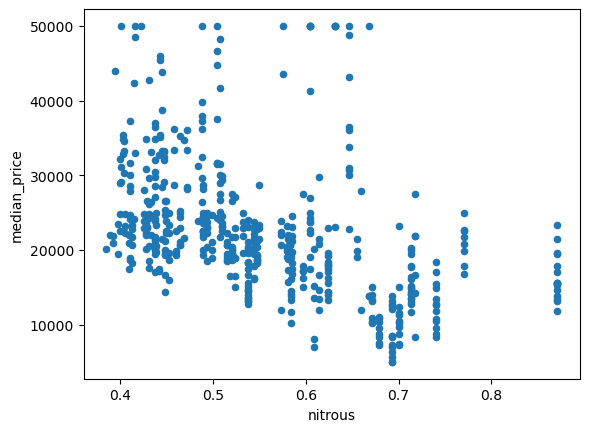

In [20]:
df.plot.scatter(x='nitrous', y='median_price')

**Use a correlation matrix to check for dependence between variables:** `df.corr()`

In [21]:
def flag(val):
    color = 'black' if val == 1. else 'red' if np.abs(val) >= 0.7 else 'black'
    return 'color: {0:s}'.format(color)
df.corr().style.applymap(flag)

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
crime_rate,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.388305
big_lots_percent,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.360445
office_percent,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.483725
charles_river,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.175260
nitrous,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.427321
avg_num_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.695360
pre_1940,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.376955
distance_to_city,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.249929
highway_access,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.381626
tax_rate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.468536


**Create a histogram of a column** 
```python
plt.hist(df['median_price'])
```

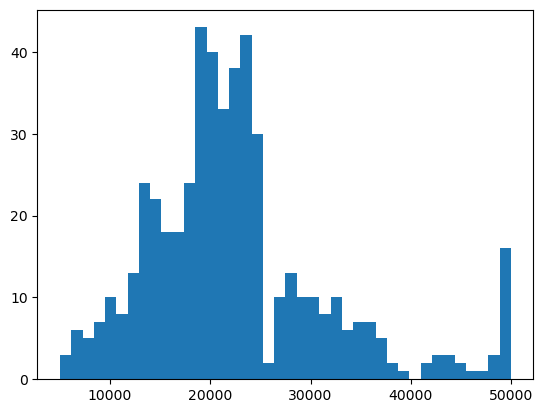

In [22]:
plt.hist(df['median_price'], bins=40)
plt.show()

### Exercises
---

**1. Check the correlation matrix for** `housing_df` **to find features that are more than 90% correlated**  
Hint: You can use `.any()` to check a Boolean filter against all columns. E.g. `(df > 10).any()` will be a boolean filter finding rows with a cell value > 10.

In [23]:
stats = df.corr()
near1 = ((stats > 0.9) & (stats < 1.)).any()
stats[near1]

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
highway_access,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.381626
tax_rate,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.468536


**2. Use a scatter plot to check linearity and equal variance for** `avg_num_rooms` **and** `student_teacher_ratio`. **Which of these is a better indicator for price?** 

<Axes: xlabel='student_teacher_ratio', ylabel='median_price'>

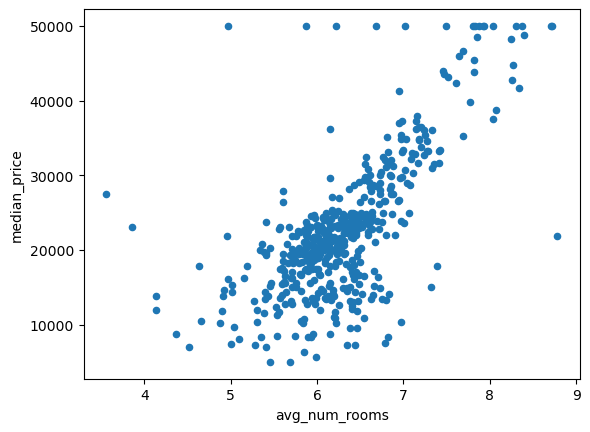

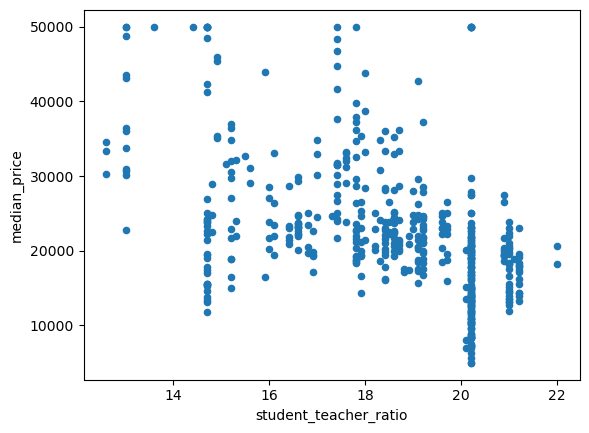

In [24]:
df.plot.scatter(x='avg_num_rooms', y='median_price')
df.plot.scatter(x='student_teacher_ratio', y='median_price')

#Average number of rooms is a better indicator based 
#on linear pattern and consistent variance

**3. Create a variable** `error` **which is the difference between** `predicted` **and** `median_price`.

In [25]:
df['error'] = modelII.predict(dfd) - df['median_price']

**4. Create a histogram of the** `error` **column. Is it normal, and centered on 0?**

<Axes: ylabel='Frequency'>

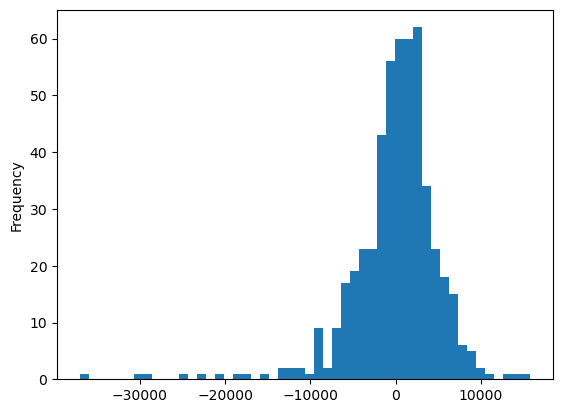

In [26]:
df['error'].plot.hist(bins=50)

# Yes, error appears normally distributed